In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

## Import CSV

In [12]:
df = pd.read_csv(r'C:\Users\Admin\Desktopworkfolder\term 2\Machine learning\CA1\factory_data.csv') #desktop

# df = pd.read_csv(r'C:\Users\alvin\Deskstopworkfolder\term 2\Machine learning\CA1\factory_data.csv') # - laptop

In [13]:
df

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


In [14]:
df.describe

<bound method NDFrame.describe of        Unique ID Product ID Quality  Ambient T (C)  Process T (C)  \
0              1     K12965       M          24.95          35.45   
1              2     Z62710       L          25.05          35.55   
2              3     T20224       L          24.95          35.35   
3              4     Z33024       L          25.05          35.45   
4              5     Z52839       L          25.05          35.55   
...          ...        ...     ...            ...            ...   
19995      19996     T87335       M          25.75          35.35   
19996      19997     Z59525       H          25.85          35.35   
19997      19998     T83921       M          25.95            NaN   
19998      19999     K42424       H          25.95          35.65   
19999      20000     Z10048       M          25.95          35.65   

       Rotation Speed (rpm)  Torque (Nm)  Tool Wear (min)  Machine Status  
0                    1551.0         42.8                0    

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [16]:
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [17]:
# Quality, Process T (C), Rotation Speed (rpm) - missing values
df.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

## Dict

Unique ID: the unique identifier

Product ID: the product ID

Quality: the machine quality, L=Low, M=Medium, H=High

Ambient T: the ambient temperature

Process T: the process temperature

Rotation Speed: the machine rotation speed measured in rpm (rounds per minute)

Torque: the torque of the machine

Tool Wear: the time of tool wear

Machine Status: 0 means normal, 1 means abnormal

## Data transformation

In [20]:
# Preprocessing data - part 1 - impute 'Rotation Speed (rpm)', 'Process T (C)'

In [21]:
df_trans = df.copy(deep=True)
impute_cols = ['Rotation Speed (rpm)', 'Process T (C)']

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_trans[impute_cols] = knn_imputer.fit_transform(df_trans[impute_cols])

In [22]:
df_trans.isnull().sum()

Unique ID                 0
Product ID                0
Quality                 991
Ambient T (C)             0
Process T (C)             0
Rotation Speed (rpm)      0
Torque (Nm)               0
Tool Wear (min)           0
Machine Status            0
dtype: int64

In [23]:
# Preprocessing data - part 2 - impute 'Quality'

In [24]:
df_trans['Quality'].value_counts(dropna = False)


Quality
L      11390
M       5696
H       1923
NaN      991
Name: count, dtype: int64

In [25]:


Quality_imputer = SimpleImputer(strategy='most_frequent')

# Example: impute 'Size' column with values like 'small', 'medium', 'large'
df_trans['Quality'] = Quality_imputer.fit_transform(df_trans[['Quality']])[:, 0]

In [26]:
df_trans.isnull().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [27]:
df_trans['Quality'].value_counts(dropna = False)

Quality
L    12381
M     5696
H     1923
Name: count, dtype: int64

In [28]:
# Preprocessing data - part 3 - encode

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
df_trans['Quality'] = encoder.fit_transform(df_trans[['Quality']])

In [31]:
df_trans

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0
1,2,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0
2,3,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0
3,4,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0
4,5,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0
19996,19997,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0
19997,19998,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0
19998,19999,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0


In [32]:
# Preprocessing data - Renaming/ dropping columns

In [33]:
df_encoded_drop = df_trans.drop(['Unique ID'], axis = 1)

In [34]:
df_encoded_drop

,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0
...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0


In [35]:
df_encoded_drop.rename(columns={
    'Ambient T (C)': 'Ambient T C',
    'Process T (C)': 'Process T C',
    'Rotation Speed (rpm)': 'Rotation Speed rpm',
    'Torque (Nm)': 'Torque Nm',
    'Tool Wear (min)': 'Tool Wear min'
}, inplace=True)


In [36]:
df_encoded_drop['Model type'] = df_encoded_drop['Product ID'].str[0]

In [37]:
df_encoded_drop

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,K
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,Z
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,T
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,Z
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,Z
...,...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0,T
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0,Z
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0,T
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0,K


## Are certain model types (K, Z, T, S) more likely to break down?

<Axes: xlabel='Model type', ylabel='count'>

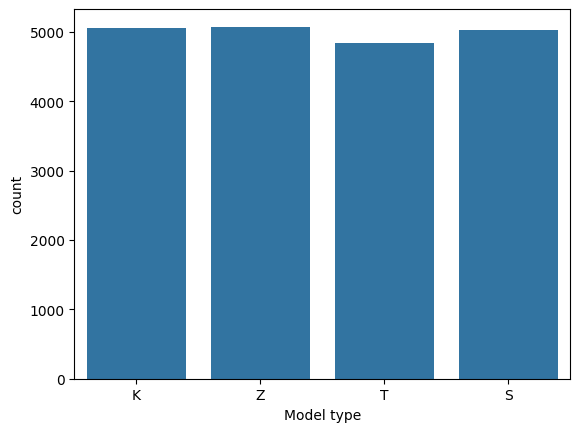

In [39]:
sns.countplot(data=df_encoded_drop, x = "Model type")

In [40]:
a = df_encoded_drop[['Machine Status', 'Model type']]
a

,Machine Status,Model type
0,0,K
1,0,Z
2,0,T
3,0,Z
4,0,Z
...,...,...
19995,0,T
19996,0,Z
19997,0,T
19998,0,K


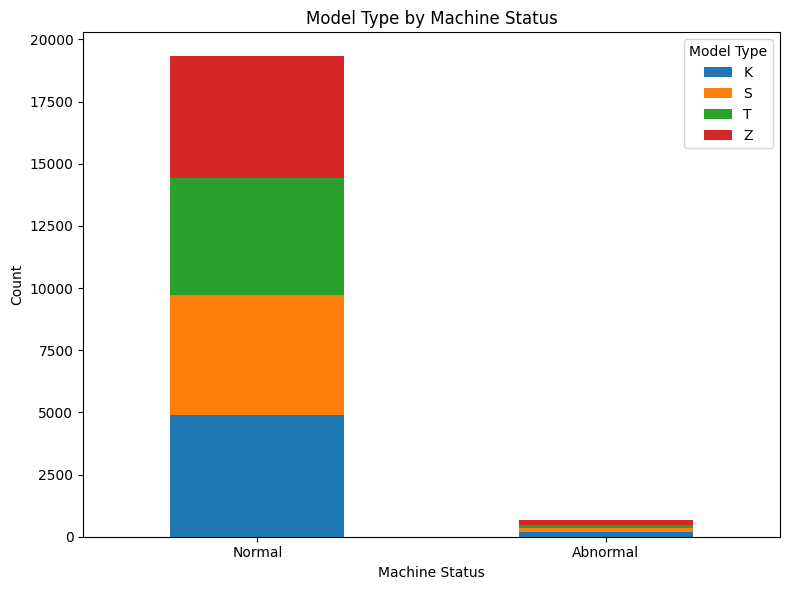

In [41]:
# Group and reshape the data
counts = a.groupby(['Machine Status', 'Model type']).size().unstack()
new_labels = ['Normal', 'Abnormal']  # Machine Status codes

# Plot the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Model Type by Machine Status')
plt.xlabel('Machine Status')
plt.ylabel('Count')
ax.set_xticklabels(new_labels, rotation=0)  # rotation=0 to keep them horizontal
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()

# It appears the graph did not provide a definitive answer 
# Given that there is uneven sample size - XGboost will be used.

In [42]:
a.value_counts()

#  Model type appears to be balanced even when you subdivide them into machine status

Machine Status  Model type
0               Z             4888
                K             4887
                S             4852
                T             4695
1               Z              187
                K              174
                S              172
                T              145
Name: count, dtype: int64

## Dummy code the model type
##### -  given that there is no previous assumption a specfic model type is better than the other. 

In [44]:
df_clean = pd.get_dummies(df_encoded_drop, columns=['Model type'], dtype=int, drop_first=True)

In [45]:
df_clean

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type_S,Model type_T,Model type_Z
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0,0,1,0
19996,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0,0,0,1
19997,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0,0,1,0
19998,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0,0,0,0


## Renaming of variables to get ready for XGBoost

In [47]:
df_clean.rename(columns={
    'Model type_S': 'Model type S',
    'Model type_T': 'Model type T',
    'Model type_Z': 'Model type Z',
}, inplace=True)
		

In [48]:
df_clean_ill = df_clean.drop(['Product ID'], axis = 1) #droping Product ID, given that columns of model type have been created

In [49]:
df_clean_ill

,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type S,Model type T,Model type Z
0,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0
1,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1
2,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0
3,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1
4,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
19995,1.0,25.75,35.350000,1482.500000,29.5,14,0,0,1,0
19996,2.0,25.85,35.350000,1632.000000,31.8,17,0,0,0,1
19997,1.0,25.95,36.904291,1538.795397,33.4,22,0,0,1,0
19998,2.0,25.95,35.650000,1408.000000,48.5,25,0,0,0,0


## Overview of relationship between variables

array([[<Axes: title={'center': 'Quality'}>,
        <Axes: title={'center': 'Ambient T C'}>,
        <Axes: title={'center': 'Process T C'}>],
       [<Axes: title={'center': 'Rotation Speed rpm'}>,
        <Axes: title={'center': 'Torque Nm'}>,
        <Axes: title={'center': 'Tool Wear min'}>],
       [<Axes: title={'center': 'Machine Status'}>,
        <Axes: title={'center': 'Model type S'}>,
        <Axes: title={'center': 'Model type T'}>],
       [<Axes: title={'center': 'Model type Z'}>, <Axes: >, <Axes: >]],
      dtype=object)

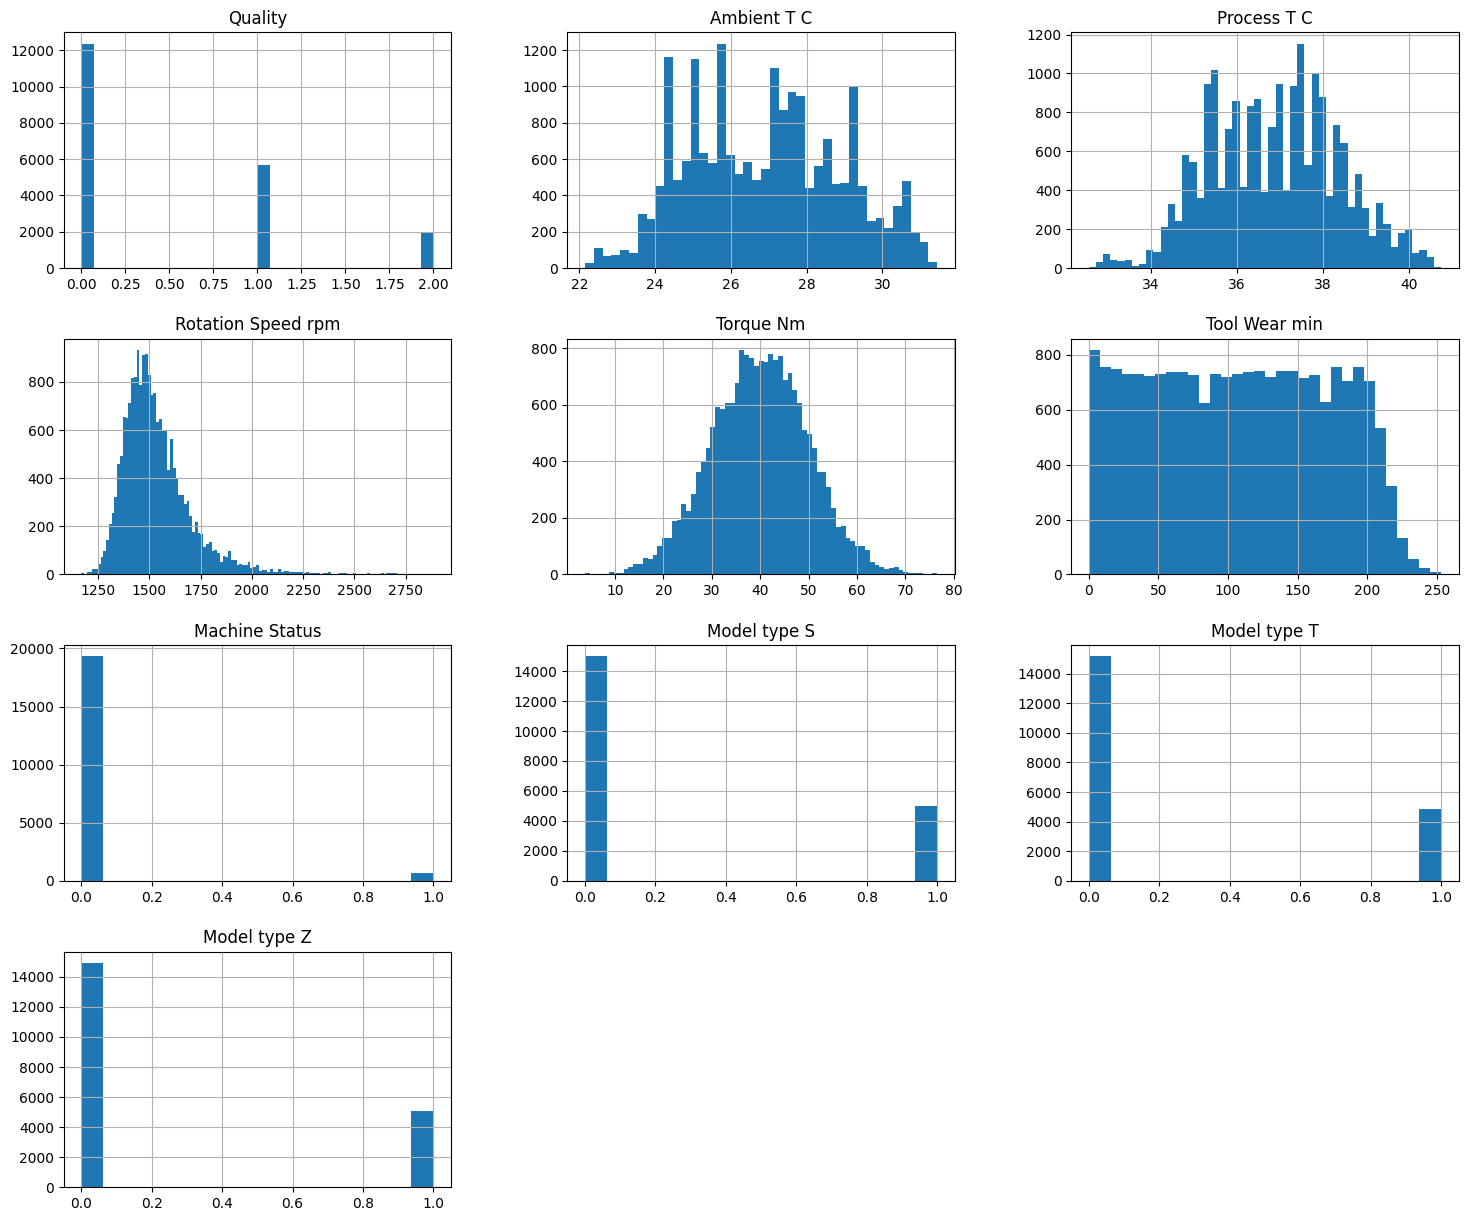

In [51]:
df_clean.hist(figsize=(18,15), bins='auto')

<Axes: >

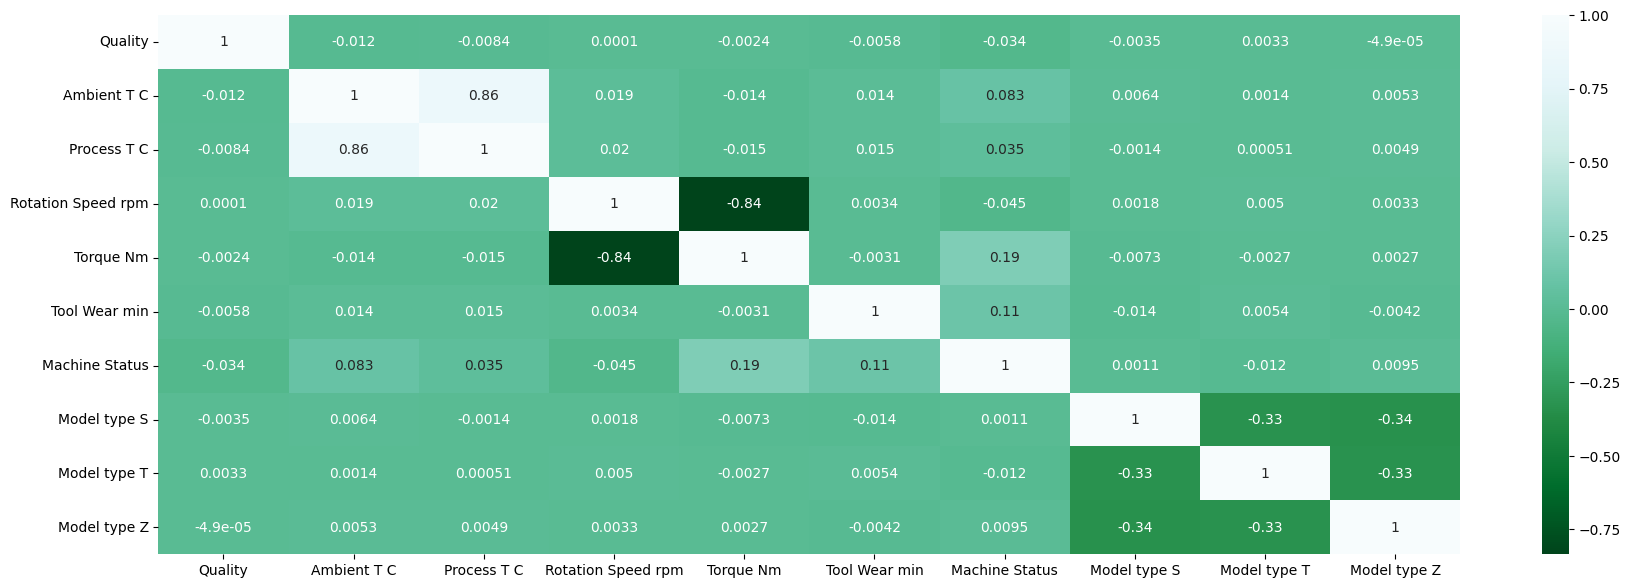

In [52]:
plt.figure(figsize=(21,7))
sns.heatmap(df_clean_ill.corr(), annot=True, cmap='BuGn_r')

In [53]:
print(f"The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86")
print(f"The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84")

The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86
The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84


## Data test split - Model fitting (Linear regression)

In [55]:
# Separate features (X) and target variable (y)
X_reg = df_clean_ill.drop('Machine Status', axis=1) # Features
y_reg = df_clean_ill['Machine Status'] #Target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [57]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16000, 9)
X_test shape: (4000, 9)
y_train shape: (16000,)
y_test shape: (4000,)


## Baseline model

In [59]:
# https://www.youtube.com/watch?v=fYZQslV9ONc&ab_channel=DataMindsHub

In [60]:

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape) #For checking 

(16000, 9)
(4000, 9)


In [61]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print(model)

# After training using the training data, use the training model to prediction using test features 
train_pred = model.predict(X_test_scaled)

# Model's performance
print("\n")
print("Baseline Logistic Regression")
print("Accuracy:", accuracy_score(y_test, train_pred))
print("AUC:", roc_auc_score(y_test, train_pred))
print("Classification Report:\n", (metrics.classification_report(y_test, train_pred)))
print(metrics.confusion_matrix(y_test, train_pred))

print('\n') # blank space

labels = {0: 'Normal', 1: 'Abnormal'}
y_test_cate = y_test.value_counts().rename(labels)
print(y_test_cate)

# Overall this model is very "accurate" because of the imbalance classes. 
# the accuracy of the model cannot be use to justify the performance of the model. 

LogisticRegression()


Baseline Logistic Regression
Accuracy: 0.968
AUC: 0.5680487348624702
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3863
           1       0.66      0.14      0.23       137

    accuracy                           0.97      4000
   macro avg       0.81      0.57      0.61      4000
weighted avg       0.96      0.97      0.96      4000

[[3853   10]
 [ 118   19]]


Machine Status
Normal      3863
Abnormal     137
Name: count, dtype: int64


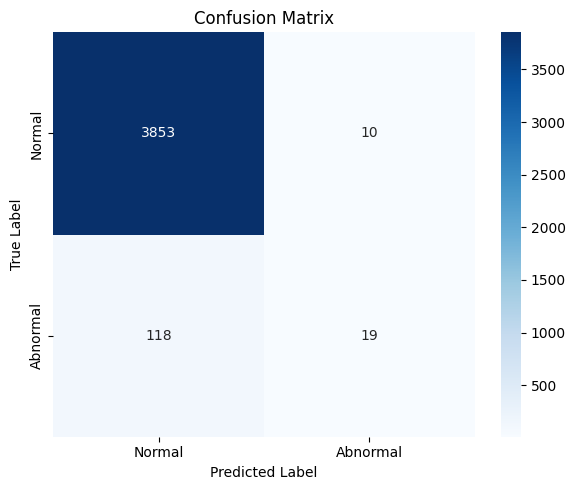

[3853   10  118   19]


In [62]:
# Confusion matrix for logistic regression
cm = metrics.confusion_matrix(y_test, train_pred)
class_names = ['Normal', 'Abnormal']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# y_test shape - 4000

print(metrics.confusion_matrix(y_test, train_pred).ravel())

## Feature creation


In [64]:
# Separate features (X) and target variable (y)
X = df_clean.drop('Machine Status', axis=1) # Features
y = df_clean['Machine Status'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
def create_features(df):
    df = df.copy()
    df['Power'] = df['Rotation Speed rpm'] * df['Torque Nm']
    #  Statistical Aggregations
    df['TorqueMean'] = df.groupby('Product ID')['Torque Nm'].transform('mean')
    df['ToolWearMax'] = df.groupby('Product ID')['Tool Wear min'].transform('max')
    # Rolling Window Statistics
    df['TorqueRollingMean'] = df.groupby('Product ID')['Torque Nm'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    return df

In [66]:
df_features = create_features(df_clean)

In [67]:
df_features.head(20)

,Product ID,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Machine Status,Model type S,Model type T,Model type Z,Power,TorqueMean,ToolWearMax,TorqueRollingMean
0,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0,0,0,0,66382.800000,42.80,0,42.8
1,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0,0,0,1,65190.400000,46.30,3,46.3
2,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0,0,1,0,74001.200000,49.40,5,49.4
3,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0,0,0,1,56603.500000,39.50,7,39.5
4,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0,0,0,1,56320.000000,32.00,63,40.0
5,K53611,1.0,24.95,35.450000,1425.000000,41.9,11,0,0,0,0,59707.500000,41.90,11,41.9
6,K40563,0.0,24.95,36.904291,1538.795397,42.4,14,0,0,0,0,65244.924814,48.05,175,42.4
7,T39301,0.0,24.95,35.450000,1527.000000,40.2,16,0,0,1,0,61385.400000,40.20,16,40.2
8,S84663,1.0,25.15,35.550000,1667.000000,28.6,18,0,1,0,0,47676.200000,35.50,158,28.6
9,Z56249,1.0,25.35,35.850000,1741.000000,28.0,21,0,0,0,1,48748.000000,28.00,21,28.0


In [68]:
# Create training dataset and test dataset, feature and target variable
train = X_train.copy()
train['Machine Status'] = y_train

test = X_test.copy()
test['Machine Status'] = y_test

# Apply function (feature creation) to both train and test sets
train = create_features(train)
test = create_features(test)

# Selecting features/target .
FEATURES = [
    'Power',
    'TorqueMean',
    'ToolWearMax',
    'TorqueRollingMean',
    'Quality',
    'Ambient T C',
    'Process T C',
    'Rotation Speed rpm',
    'Torque Nm',
    'Tool Wear min',
    'Model type S',
    'Model type T',
    'Model type Z'
]
TARGET = 'Machine Status'

# training data set
X_train = train[FEATURES]
y_train = train[TARGET]

# testing data set
X_test = test[FEATURES]
y_test = test[TARGET]

In [69]:
y_train

5894     0
3728     0
8958     0
7671     0
5999     1
        ..
11284    1
11964    0
5390     0
860      0
15795    0
Name: Machine Status, Length: 16000, dtype: int64

In [70]:
X_train

,Power,TorqueMean,ToolWearMax,TorqueRollingMean,Quality,Ambient T C,Process T C,Rotation Speed rpm,Torque Nm,Tool Wear min,Model type S,Model type T,Model type Z
5894,60526.3,37.9,164,37.9,0.0,28.05,37.75,1597.0,37.9,164,0,0,0
3728,64836.5,44.5,83,44.5,0.0,29.15,38.15,1457.0,44.5,83,1,0,0
8958,48031.8,27.7,70,27.7,1.0,24.25,34.95,1734.0,27.7,70,1,0,0
7671,74401.6,51.1,193,51.1,1.0,27.35,38.45,1456.0,51.1,193,0,0,0
5999,50965.5,30.5,234,30.5,1.0,27.25,37.05,1671.0,30.5,234,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,32940.9,15.3,98,15.3,0.0,25.35,36.45,2153.0,15.3,98,1,0,0
11964,65894.5,46.9,113,46.9,1.0,24.75,34.45,1405.0,46.9,113,0,0,1
5390,69997.6,47.2,223,47.2,2.0,29.65,39.15,1483.0,47.2,223,0,0,1
860,50236.6,32.6,33,32.6,2.0,22.95,33.75,1541.0,32.6,33,0,1,0


## finding the best parameters

In [72]:
param_grid = {
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

num_positive = sum(y_train == 1)
num_negative = sum(y_train == 0)

scale_pos_weight = num_negative / num_positive

xgb_clf = XGBClassifier(scale_pos_weight = num_negative / num_positive)

randomsearch = RandomizedSearchCV(xgb_clf, param_grid, cv=5)
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.01, 0.1, 1, 10],
                                        'subsample': [0.8, 1]})

In [73]:
# Print the tuned parameters and score
print("Tuned XGboost Parameters: {}".format(randomsearch.best_params_))
print("Tuned XGboost Regression Best Accuracy Score: {}".format(randomsearch.best_score_))

Tuned XGboost Parameters: {'subsample': 1, 'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1}
Tuned XGboost Regression Best Accuracy Score: 0.9881249999999999


In [74]:
# Get the best model
best_reg = randomsearch.best_estimator_
# Validate the model
y_pred   = best_reg.predict(X_test)

In [75]:
y_pred_probs = best_reg.predict_proba(X_test)[:,1]
y_pred_probs[0]

0.00010250981

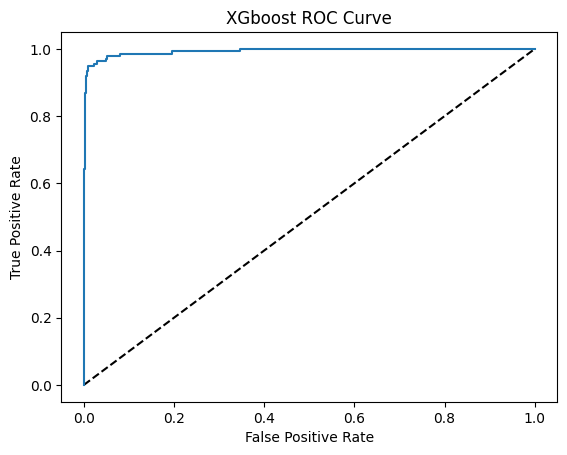

AUC: 0.9932543634065276


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGboost ROC Curve')
plt.show()

print("AUC:", roc_auc_score(y_test, y_pred_probs))

In [77]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3834
           1       0.95      0.78      0.86       166

    accuracy                           0.99      4000
   macro avg       0.97      0.89      0.93      4000
weighted avg       0.99      0.99      0.99      4000



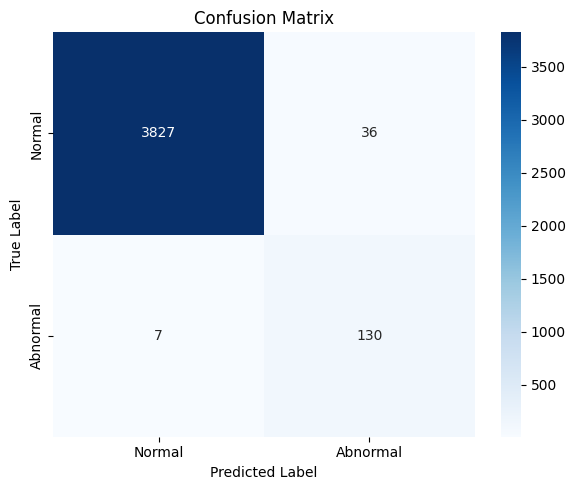

[3827   36    7  130]


In [78]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
class_names = ['Normal', 'Abnormal']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# y_test shape - 4000

print(metrics.confusion_matrix(y_test, y_pred).ravel())

In [79]:
cm

array([[3827,   36],
       [   7,  130]], dtype=int64)

In [80]:
# Get feature importances
fi = best_reg.feature_importances_
features = X_train.columns

# Sort and display
fi_df = pd.DataFrame({'feature': features, 'importance': fi})
fi_df = fi_df.sort_values('importance', ascending=False)

print(fi_df)

               feature  importance
3    TorqueRollingMean    0.221242
8            Torque Nm    0.183940
9        Tool Wear min    0.173561
7   Rotation Speed rpm    0.161392
0                Power    0.079809
5          Ambient T C    0.043153
2          ToolWearMax    0.032921
1           TorqueMean    0.027011
6          Process T C    0.025019
4              Quality    0.018129
11        Model type T    0.016343
12        Model type Z    0.008976
10        Model type S    0.008503


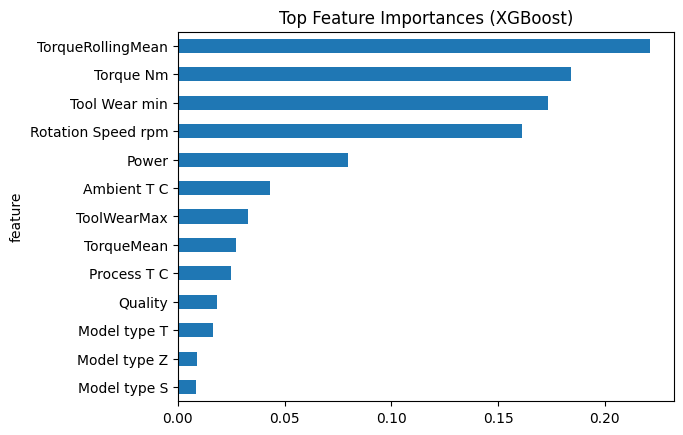

In [81]:
# Plot top features
fi_df.head(20).plot.barh(x='feature', y='importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (XGBoost)")
plt.show()

In [82]:
# Gain = Total gains of splits which use the feature. (Features with high gain are usually the most important features)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

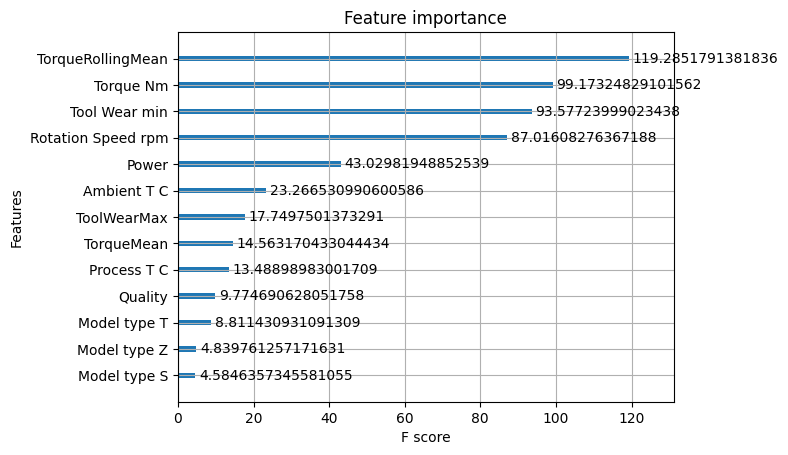

In [83]:
xgb.plot_importance(best_reg, importance_type="gain")

In [84]:
# learning curve visualise the effect of the number of observation on the performance metric
# training set vs. test set

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html


train_sizes, train_scores, test_scores = learning_curve(
    best_reg,
    X_train,
    y_train,
    train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0],
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [85]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 0.99995265, 0.99900568, 0.99809696, 0.99746875])

In [86]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.00000000e+00, 9.46969697e-05, 2.69512301e-04, 1.79172114e-04,
       3.87802301e-04])

In [87]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.9705625, 0.98225  , 0.98525  , 0.9863125, 0.988125 ])

In [88]:
test_std = np.std(test_scores, axis = 1)
test_std

array([0.00272001, 0.00147108, 0.00181573, 0.0024796 , 0.00204443])

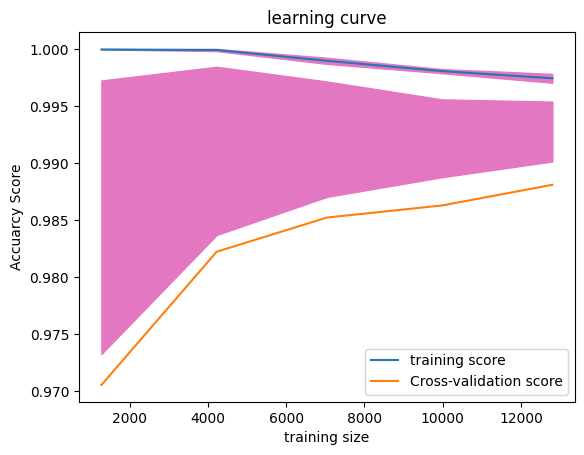

In [89]:
plt.plot(train_sizes, train_mean, label = 'training score') #this is the accuracy of the training dataset
plt.plot(train_sizes, test_mean, label = 'Cross-validation score') 


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#e377c2')
plt.fill_between(train_sizes, train_mean - test_std, test_mean + test_std, color='#e377c2')


plt.title("learning curve")
plt.xlabel("training size")
plt.ylabel("Accuarcy Score")
plt.legend(loc= "best") 

# explaination for learning curve
The model likely overfit on small training sets, but learns to generalize with more data. Given its imbalance classes, it is normal. Thus, if you want to analyse machine status - the sample size has to be large if the distrbution of machine status is known to be imbalanced

## shap
-  Y-axis indicates the feature names in order of importance from top to bottom.
-  
X-axis represents the SHAP value, which indicates the degree of change in log odds.
-  
The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low valus
- .
Each point represents a row of data from the original dataset.

In [91]:

explainer = shap.Explainer(best_reg)
shap_values = explainer(X_test)

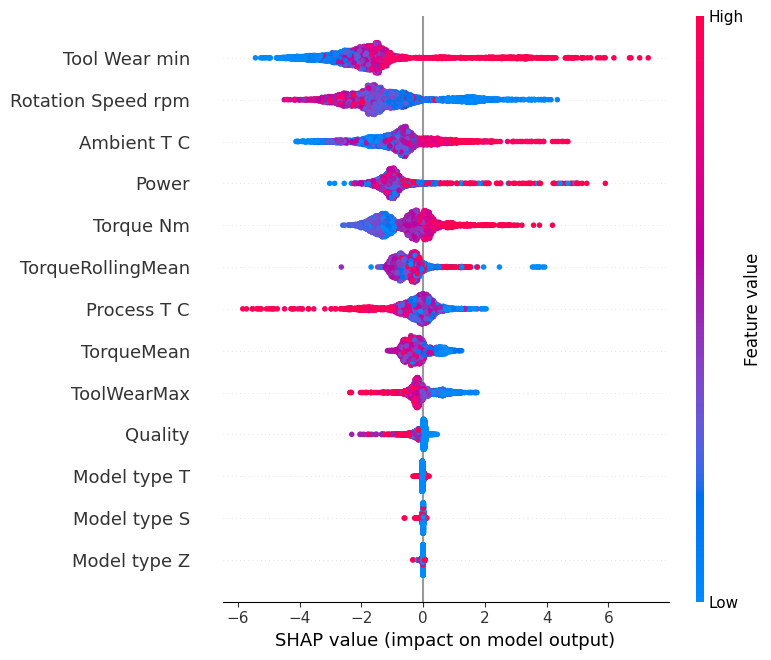

In [92]:
shap.summary_plot(shap_values, X_test, feature_names = FEATURES)

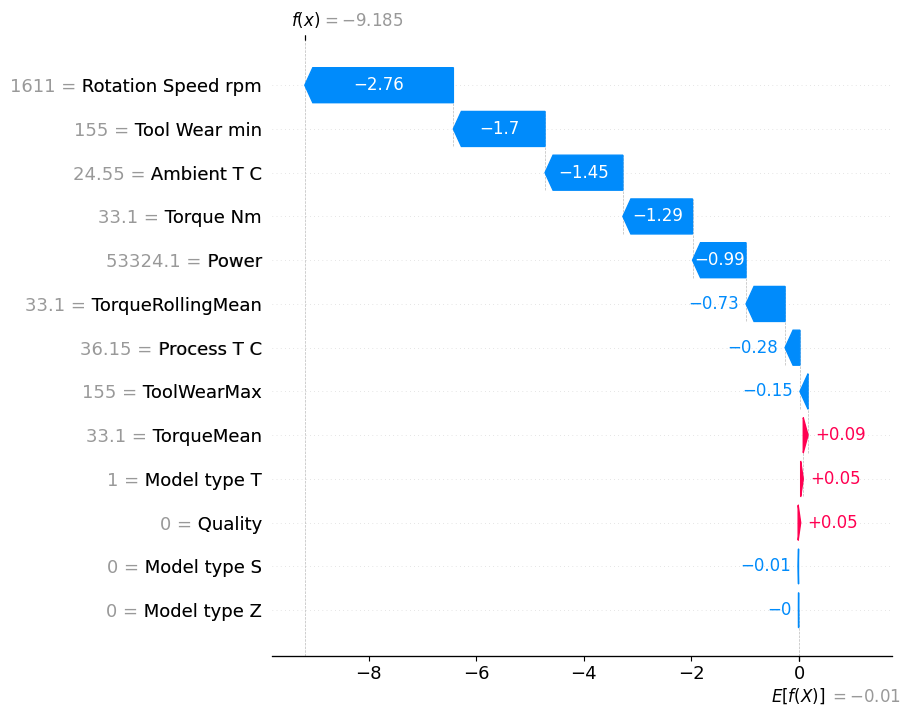

In [93]:
shap.waterfall_plot(shap_values[0], max_display = 15)
# Gives the contribution of each feature to the model's output for a specific prediction. 
# The output is sequential view of how features influence the model's prediction
# Features pushing the prediction higher are shown in red, while those pushing it lower are in blue.
# Machine Status: 0 means normal, 1 means abnormal

# XGBoost gain importance

The average reduction in training loss (e.g. squared error) every time a feature is used in a split.

Favors features that are used often in many splits—even if each split only nudges the prediction a little.

# SHAP global importance

The average absolute SHAP value across all samples—that is, how much each feature actually moves the model’s output on average.

Favors features that occasionally have large effects on individual predictions, even if they’re used less frequently.